# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [354]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [355]:
learning_rate = 0.01
epochs = 1000

In [356]:
x = np.random.randn(50)
y = 2*x + np.random.randn(50)

W = tf.Variable(np.random.randn(), name="weights")
b = tf.Variable(np.random.randn(), name="bias")

In [357]:
def linear_regression(x):
    return W * x + b

def mean_square(pred_y, true_y):
    return tf.reduce_mean(tf.square(pred_y - true_y))

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [358]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred_y = linear_regression(x)
        true_y = y
        loss = mean_square(pred_y, true_y)

    grads = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(grads, [W, b]))

In [359]:
for epoch in range(1, epochs + 1):
    run_optimization()

    if epoch % 50 == 0:
        pred = linear_regression(x)
        loss = mean_square(pred, y)
        print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb:{:.4f}".format(epoch, loss, W.numpy(), b.numpy()))

step:   50	loss: 2.2508	W: 0.8727	b:0.1620
step:  100	loss: 1.0762	W: 1.5881	b:0.0005
step:  150	loss: 0.9494	W: 1.8156	b:-0.0804
step:  200	loss: 0.9348	W: 1.8889	b:-0.1169
step:  250	loss: 0.9331	W: 1.9128	b:-0.1325
step:  300	loss: 0.9329	W: 1.9207	b:-0.1389
step:  350	loss: 0.9328	W: 1.9234	b:-0.1415
step:  400	loss: 0.9328	W: 1.9243	b:-0.1426
step:  450	loss: 0.9328	W: 1.9246	b:-0.1430
step:  500	loss: 0.9328	W: 1.9247	b:-0.1431
step:  550	loss: 0.9328	W: 1.9248	b:-0.1432
step:  600	loss: 0.9328	W: 1.9248	b:-0.1432
step:  650	loss: 0.9328	W: 1.9248	b:-0.1432
step:  700	loss: 0.9328	W: 1.9248	b:-0.1432
step:  750	loss: 0.9328	W: 1.9248	b:-0.1432
step:  800	loss: 0.9328	W: 1.9248	b:-0.1432
step:  850	loss: 0.9328	W: 1.9248	b:-0.1432
step:  900	loss: 0.9328	W: 1.9248	b:-0.1432
step:  950	loss: 0.9328	W: 1.9248	b:-0.1432
step: 1000	loss: 0.9328	W: 1.9248	b:-0.1432


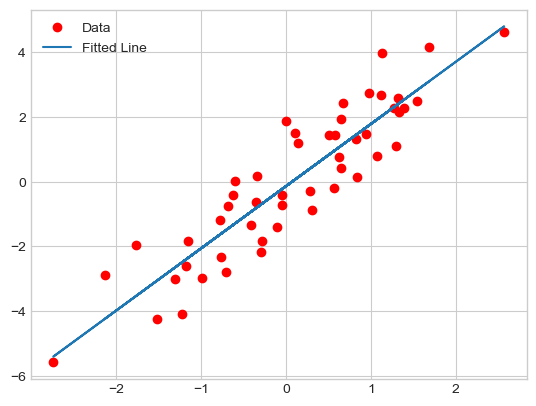

In [360]:
plt.plot(x, y, "ro", label="Data")
plt.plot(x, linear_regression(x), label="Fitted Line")
plt.legend()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [361]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [362]:
learning_rate = 0.04
epochs = 1000

### 변수 지정

In [363]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [364]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.02229781
0.9010793
-0.24026275


### 데이터 지정

In [365]:
x = np.random.randn(50)
y = x**2 + x*np.random.randn(50)

line_x = np.arange(min(x), max(x), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

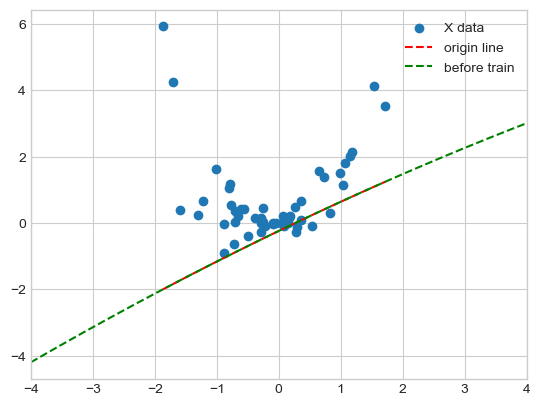

In [366]:
plt.scatter(x, y, label="X data")
plt.plot(line_x, line_y, "r--", label="origin line")
plt.plot(x_, y_, "g--", label="before train")
plt.xlim([-4.0, 4.0])
plt.legend()
plt.show()

### Util Functions

In [367]:
def run_optimization_2():
    with tf.GradientTape() as tape:
        pred_y = a*x**2 + b*x + c
        true_y = y
        loss = tf.reduce_mean(tf.square(pred_y - true_y))

    grads = tape.gradient(loss, [a, b, c])

    optimizer.apply_gradients(zip(grads, [a, b, c]))

### Optimizer

In [368]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### 학습

In [369]:
for epoch in range(1, epochs + 1):
    run_optimization_2()

    if epoch % 50 == 0:
        pred = a*x**2 + b*x + c
        loss = tf.reduce_mean(tf.square(pred - y))
        print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:   50	a: 1.0816	b: 0.3418	c: 0.1044
epoch:  100	a: 1.3005	b: 0.3506	c: -0.1098
epoch:  150	a: 1.3007	b: 0.3481	c: -0.1090
epoch:  200	a: 1.3002	b: 0.3476	c: -0.1081
epoch:  250	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  300	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  350	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  400	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  450	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  500	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  550	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  600	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  650	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  700	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  750	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  800	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  850	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  900	a: 1.3002	b: 0.3476	c: -0.1082
epoch:  950	a: 1.3002	b: 0.3476	c: -0.1082
epoch: 1000	a: 1.3002	b: 0.3476	c: -0.1082


### 학습 후의 회귀선

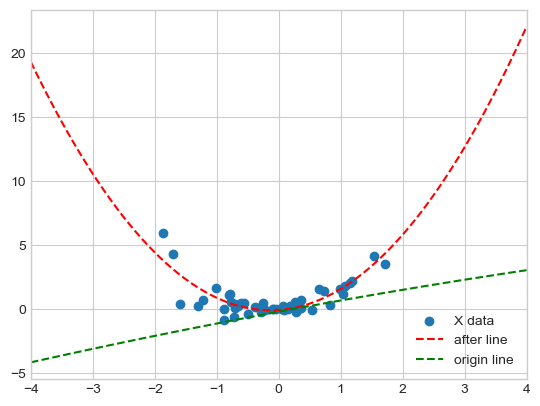

In [370]:
line_x = np.arange(-4.0, 4.0, 0.001)
line_y = a*x_**2 + b*x_ + c

plt.scatter(x, y, label="X data")
plt.plot(line_x, line_y, "r--", label="after line")
plt.plot(x_, y_, "g--", label="origin line")
plt.xlim([-4.0, 4.0])
plt.legend()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [371]:
from tensorflow.keras.datasets.mnist import load_data

### 하이퍼 파라미터 (Hyper Parameter)


In [372]:
num_classes = 10
num_features = 784
learning_rate = 0.1
epochs = 1000
batch_size = 256

### 데이터 로드

In [373]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = np.array(x_train, dtype=np.float32).reshape(-1, 28*28), np.array(x_test, dtype=np.float32).reshape(-1, 28*28)
x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [374]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size=batch_size).prefetch(1)

### 변수 지정

In [375]:
W = tf.Variable(tf.random.normal(shape=(num_features, num_classes)), name="weights")
b = tf.Variable(tf.zeros(shape=(num_classes)), name="bias")

### Util Functions

In [376]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth=10)
    # 최소값과 최대값으로 범위를 정하고 이 범위를 벗어나는 값들을 최소값과 최대값으로 변환
    pred_y = tf.clip_by_value(pred_y, clip_value_min=1e-9, clip_value_max=1.)

    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), axis=1))

def accuracy(pred_y, true_y):
    pred_y = tf.argmax(pred_y, axis=1)
    true_y = tf.cast(true_y, dtype=tf.int64)
    correct_prediction = tf.equal(pred_y, true_y)

    return tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

### Optimizer

In [377]:
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [378]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred_y = logistic_regression(x)
        true_y = y
        loss = cross_entropy(pred_y, true_y)

    grads = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(grads, [W, b]))

### 학습 진행

In [379]:
for epoch, (x_batch, y_batch) in enumerate(train_data.take(epochs), 1):
    run_optimization(x_batch, y_batch)

    if epoch % 100 == 0:
        pred = logistic_regression(x_batch)
        loss = cross_entropy(pred, y_batch)
        acc = accuracy(pred, y_batch)
        print("step: {:4d}\tloss: {:.4f}\t accuracy: {:.4f}".format(epoch, loss, acc))

step:  100	loss: 0.5642	 accuracy: 0.8906
step:  200	loss: 0.8282	 accuracy: 0.9023
step:  300	loss: 0.6046	 accuracy: 0.9062
step:  400	loss: 0.6988	 accuracy: 0.8984
step:  500	loss: 0.4647	 accuracy: 0.9141
step:  600	loss: 0.7532	 accuracy: 0.9102
step:  700	loss: 0.6367	 accuracy: 0.9258
step:  800	loss: 0.4575	 accuracy: 0.9141
step:  900	loss: 0.7474	 accuracy: 0.9297
step: 1000	loss: 0.6777	 accuracy: 0.9180


###  테스트

In [380]:
pred_y = logistic_regression(x_test)
print("Test Accuracy: {:.4f}".format(accuracy(pred_y, y_test)))

Test Accuracy: 0.9096


### 시각화

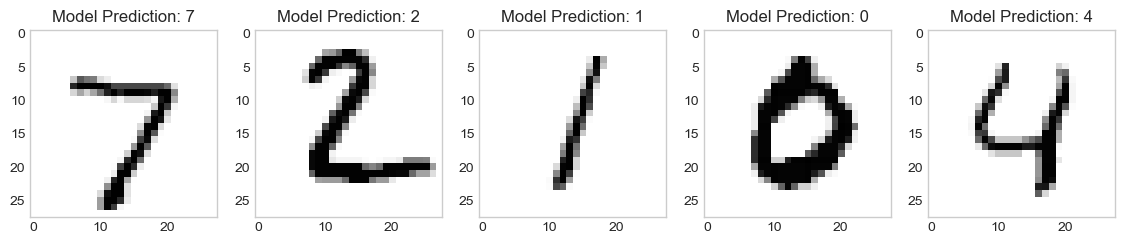

In [391]:
num_images = 5

test_images = x_test[:num_images]

predictions = logistic_regression(test_images)

plt.figure(figsize=(14, 8))

for index, img in enumerate(test_images):
    plt.subplot(1, 5, index+1)
    plt.imshow(img.reshape(28, 28))
    plt.title("Model Prediction: {}".format(tf.argmax(predictions[index].numpy())))
    plt.grid(False)

plt.show()